In [62]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
import string as str
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import string
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
import pandas as pd
import re
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = []
with open('/content/text.txt', 'r') as file:
    for line in file:
        array_part, text_part = line.split(']', 1)
        array = [float(x) for x in array_part.strip('[ ').split()]
        text = text_part.strip()
        data.append((array, text))
print("Array:", data[0])

Array: ([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'During the period of falling in love, each time that we met and especially when we had not met for a long time.')


In [4]:
df = pd.DataFrame(data, columns=['emotions', 'text'])

In [5]:
X = df['text']
y = np.array(df['emotions'].tolist())

In [6]:
def process_text(text):
    text = text.lower()
    text = ''.join([i for i in text if not i.isdigit()])
    text = ' '.join(text.split())
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_words)
X_processed = [process_text(text) for text in X]

In [8]:
remove = ['.',',','(',')','\'','\"','\'','\""',]
for i in range(len(X_processed)):
  for j in remove:
    X_processed[i] = X_processed[i].replace(j,'')

In [12]:
for i in range(len(X_processed)):
  X_processed[i] = re.sub(' +', ' ',X_processed[i])

In [14]:
y = np.array(y)

In [16]:
target=['joy','fear','anger','sadness','disgust','shame','guilt']

In [18]:
labels = []
for v in y:
    labels.append(target[np.argmax(v)])
labels[:8]

['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy']

In [20]:
labels = pd.DataFrame(labels)

In [23]:
labels.value_counts

<bound method DataFrame.value_counts of             0
0         joy
1        fear
2       anger
3     sadness
4     disgust
...       ...
7475    anger
7476  sadness
7477  disgust
7478    shame
7479    guilt

[7480 rows x 1 columns]>

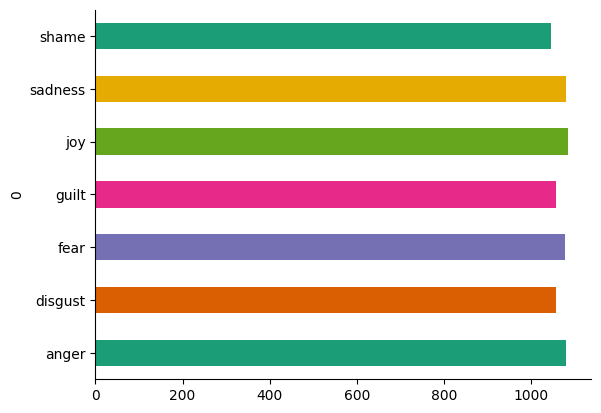

In [24]:
labels.groupby(0).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Distribution of Emotions')

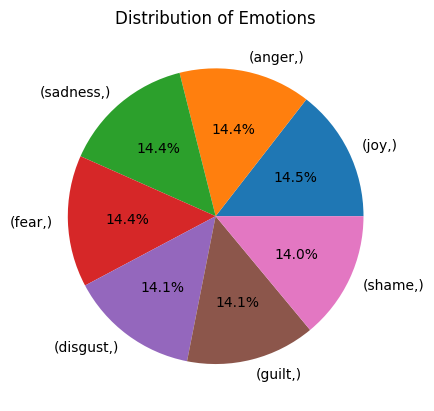

In [25]:
labels.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Emotions')

In [27]:
encoded_labels = label_encoder.fit_transform(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(encoded_labels)

In [30]:
y_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X_processed)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, encoded_labels, test_size=0.2, random_state=42)

In [41]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [51]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': accuracy})

In [55]:
df_results = pd.DataFrame(results)
df_results

,Model,Accuracy
0,Logistic Regression,0.578209
1,Support Vector Machine,0.568182
2,Multinomial Naive Bayes,0.559492
3,Decision Tree,0.481283
4,Random Forest,0.578877


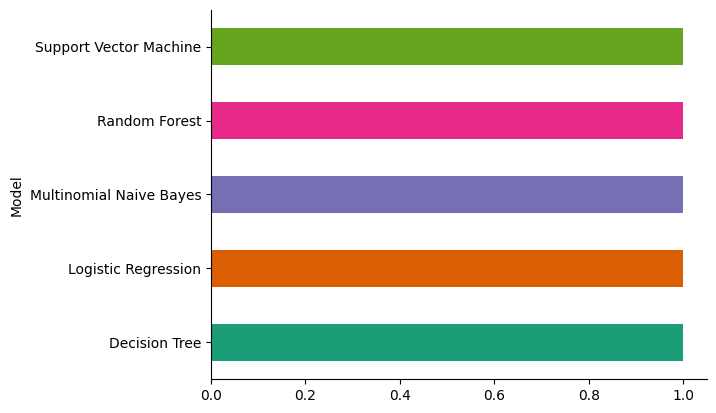

In [54]:
df_results.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [57]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_tfidf, y_cat, test_size=0.2, random_state=42)

In [66]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train_nn.shape[1]))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [67]:
history = model.fit(X_train_nn, y_train_nn, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1516 - loss: 2.0879 - val_accuracy: 0.2632 - val_loss: 1.9369
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2349 - loss: 1.8926 - val_accuracy: 0.3576 - val_loss: 1.9121
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3248 - loss: 1.7374 - val_accuracy: 0.4127 - val_loss: 1.8492
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4076 - loss: 1.6241 - val_accuracy: 0.4545 - val_loss: 1.7303
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4698 - loss: 1.5017 - val_accuracy: 0.4837 - val_loss: 1.5998
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5437 - loss: 1.3847 - val_accuracy: 0.5013 - val_loss: 1.5128
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5895 - loss: 1.2840 - val_accuracy: 0.5171 - val_loss: 1.4562
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6337 - loss: 1.1895 - val_accuracy:

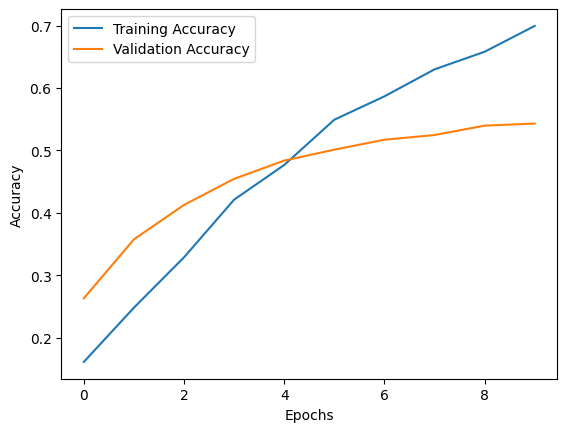

In [68]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [81]:
word = ['nice lets pparty']
word_processed = [process_text(text) for text in word]
word_tfidf = tfidf.transform(word_processed)

In [82]:
y_pred = model.predict(word_tfidf)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [83]:
predicted_labels = np.argmax(y_pred, axis=1)
print([target[label] for label in predicted_labels])

['disgust']


In [84]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 100)                 │         616,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │             707 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,853,623 (7.07 MB)

 Trainable params: 617,807 (2.36 MB)

 Non-trainable params: 200 (800.00 B)

 Optimizer params: 1,235,616 (4.71 MB)